In [1]:
import numpy as np
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

Porównanie regresji kernelowej z jądrem RBF. W przypadku gdy ustawimy wysokie gamma
(małą szerokość jądra) dostajemy overfitting (zielona krzywa). W przypadku za dużego jądra dostajemy
underfitting (niebieska krzywa). Optymalnie dobrana szerokość jądra daje poprawne dopasowanie
krzywej (pomarańczowa krzywa).

In [2]:
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
y = np.vstack(y)
X = np.vstack(X)

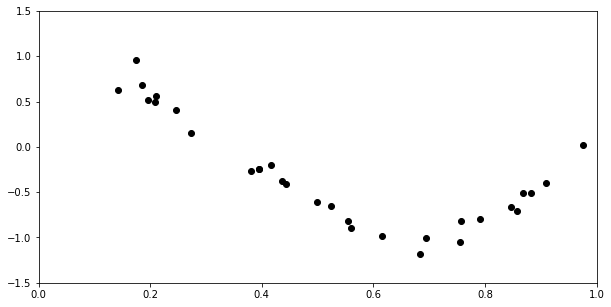

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
plt.scatter(X, y,  color='black')
ax.set_xlim([0,1])
ax.set_ylim([-1.5,1.5])
plt.show()

In [4]:
model1 = KernelRidge(kernel='rbf', gamma=0.01, alpha = 0.001)
model2 = KernelRidge(kernel='rbf', gamma=10, alpha = 0.001)
model3 = KernelRidge(kernel='rbf', gamma=100, alpha = 0.001)
model4 = KernelRidge(kernel='rbf', gamma=1000, alpha = 0.001)
model5 = KernelRidge(kernel='rbf', gamma=10000, alpha = 0.001)

In [5]:
model1.fit(X,y)
model2.fit(X,y)
model3.fit(X,y)
model4.fit(X,y)
model5.fit(X,y)

KernelRidge(alpha=0.001, gamma=10000, kernel='rbf')

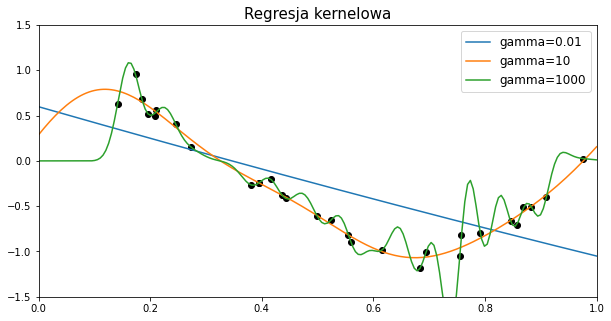

In [6]:
x_f_lr = np.vstack(np.linspace(0, 1, 200))

fig = plt.figure(figsize=(10,5))
plt.scatter(X, y,  color='black')

plt.plot(x_f_lr, model1.predict(x_f_lr), label='gamma=0.01')
plt.plot(x_f_lr, model2.predict(x_f_lr), label='gamma=10')
# plt.plot(x_f_lr, model3.predict(x_f_lr), label='gamma=100')
plt.plot(x_f_lr, model4.predict(x_f_lr), label='gamma=1000')
# plt.plot(x_f_lr, model5.predict(x_f_lr), label='polinominal 3')
plt.xlim([0,1])
plt.ylim([-1.5,1.5])
plt.legend(fontsize=12)
plt.title("Regresja kernelowa", fontsize=15)
plt.show()